In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [3]:
class LogisticRegression() :
      
    def __init__( self, learning_rate, iterations):          
        self.learning_rate = learning_rate        
        self.iterations = iterations        

          
    # Function for model training            
    def fit( self, X, Y) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
        print('no_of_training_examples, no_of_features: ',self.m, self.n ) 
        # weight initialization        
        self.W = np.zeros(self.n)
        #self.cost= [] 
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning           
        self.calculate_weights()
        
        return self
      
    # Helper function to update weights in gradient descent
    def calculate_weights(self):
        cost = []
        for i in range(self.iterations) :
            #Prediction
            y_pred = self.predict1(self.X)

            cost_i = (-1/self.m)*(np.sum((self.Y*np.log(y_pred)) + ((1-self.Y)*(np.log(1-y_pred)))))
            #

            #Gradient calculation
            dw = (1/self.m)*(self.X.T.dot(y_pred- self.Y))
            db = (1/self.m)*(np.sum(y_pred- self.Y))
            
            self.W = self.W - (self.learning_rate * (dw.T))
            self.b = self.b - (self.learning_rate * (db.T))
            cost.append(cost_i)
            #grads = {"dw": dw, "db": db}
            self.cost = cost
            #return grads, cost
        return self
    
    def sigmoid_activation(self, y):        
        y_hat = 1/(1+np.exp(-y))
        return y_hat
    
      
    # Hypothetical function  h( x ) 
    def predict1(self, X) :    
        return self.sigmoid_activation(X.dot(self.W ) + self.b)
    
    def predict(self, X) :
        y_hat = self.sigmoid_activation(X.dot(self.W ) + self.b)
        return [1 if x > 0.5 else 0 for x in y_hat ]

In [4]:
df = pd.read_csv('data/diabetes.csv')

In [ ]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df=df.dropna()

In [5]:
X = df.iloc[:,0:-2].values
y = df.iloc[:,-1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
model = LogisticRegression( iterations = 4500,                             
                            learning_rate = 0.0001)

In [8]:
model.fit( X_train, y_train )

no_of_training_examples, no_of_features:  75 7


In [9]:
y_hat = model.predict(X_test)

In [10]:
print('Test Accuracy',accuracy_score(y_hat, y_test))

Test Accuracy 0.5454545454545454


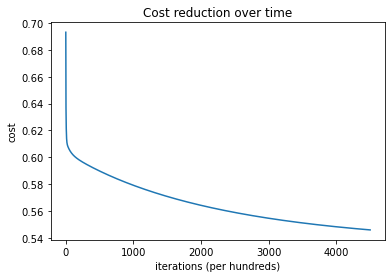

In [11]:
plt.plot(model.cost)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()